In [1]:
import torchvision

print(torchvision.datasets.__all__)

('LSUN', 'LSUNClass', 'ImageFolder', 'DatasetFolder', 'FakeData', 'CocoCaptions', 'CocoDetection', 'CIFAR10', 'CIFAR100', 'EMNIST', 'FashionMNIST', 'QMNIST', 'MNIST', 'KMNIST', 'StanfordCars', 'STL10', 'SUN397', 'SVHN', 'PhotoTour', 'SEMEION', 'Omniglot', 'SBU', 'Flickr8k', 'Flickr30k', 'Flowers102', 'VOCSegmentation', 'VOCDetection', 'Cityscapes', 'ImageNet', 'Caltech101', 'Caltech256', 'CelebA', 'WIDERFace', 'SBDataset', 'VisionDataset', 'USPS', 'Kinetics', 'HMDB51', 'UCF101', 'Places365', 'Kitti', 'INaturalist', 'LFWPeople', 'LFWPairs', 'KittiFlow', 'Sintel', 'FlyingChairs', 'FlyingThings3D', 'HD1K', 'Food101', 'DTD', 'FER2013', 'GTSRB', 'CLEVRClassification', 'OxfordIIITPet', 'PCAM', 'Country211', 'FGVCAircraft', 'EuroSAT', 'RenderedSST2', 'Kitti2012Stereo', 'Kitti2015Stereo', 'CarlaStereo', 'Middlebury2014Stereo', 'CREStereo', 'FallingThingsStereo', 'SceneFlowStereo', 'SintelStereo', 'InStereo2k', 'ETH3DStereo')


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) ## Normalizing the images.

batch_size = 4 

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) ## getting train dataset.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) 

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) ## getting the test data
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 42417549.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


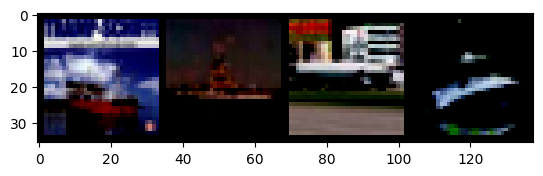

ship  ship  plane ship 


In [11]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() ## tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0))) ## re arrange the tensor
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size))) 

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.843
[1,  6000] loss: 1.690
[1,  8000] loss: 1.595
[1, 10000] loss: 1.544
[1, 12000] loss: 1.488
[2,  2000] loss: 1.417
[2,  4000] loss: 1.383
[2,  6000] loss: 1.361
[2,  8000] loss: 1.325
[2, 10000] loss: 1.315
[2, 12000] loss: 1.296
Finished Training


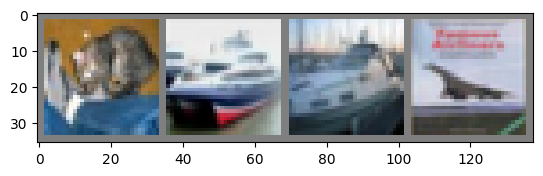

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [10]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 59.0 %
Accuracy for class: car   is 65.5 %
Accuracy for class: bird  is 32.9 %
Accuracy for class: cat   is 41.0 %
Accuracy for class: deer  is 41.0 %
Accuracy for class: dog   is 39.7 %
Accuracy for class: frog  is 69.7 %
Accuracy for class: horse is 77.0 %
Accuracy for class: ship  is 63.6 %
Accuracy for class: truck is 66.1 %
